# Hyperparameters of Neural Networks

To make a neural network train successfully, you might:

- change the number of layers
- change the number of neurons
- choose an activation function.
- choose a loss function.
- choose an initialization strategy.
- choose an optimization algorithm.
- Batch Normalization

### Activation Functions:

- Number of layers
- Number of neurons
- Loss Optimiser

Number of layers and number of neurons can tell you about overfitting.

If you add enough neurons and layers, you can solve every problem theoretically! But it gets complicated - we want our model to train in a finite time!

http://krspiced.pythonanywhere.com/chapters/project_mnist/training_strategies/README.html

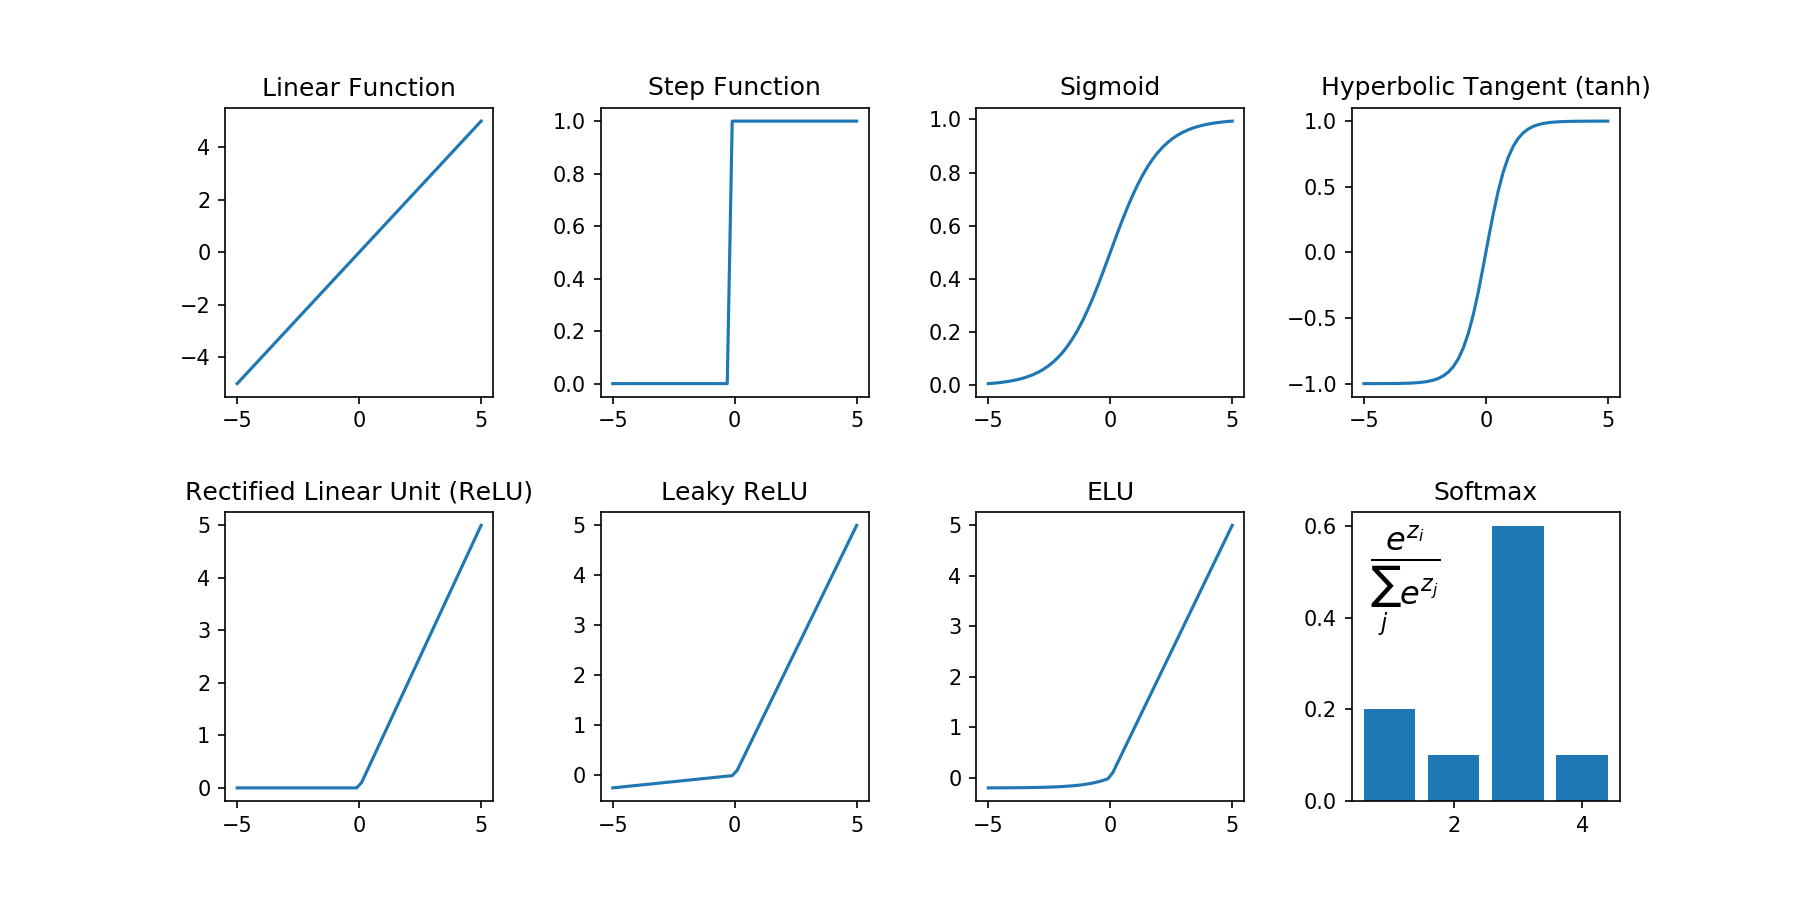

| function | layer | description |
|----------|-------|-------------|
| Linear | output | regression | 
| Sigmoid | output | binary classification | 
| Softmax | output | multiclass classification | 
| ReLU | hidden | good first coice | 
| Leaky ReLU | hidden | avoids “dying ReLU” problem | 
| ELU | hidden | better but more expensive | 
| tanH | hidden | usually slower than ReLU | 
| step | - | not fully differentiable | 

- There is no single best choice. A rule of thumb is:

`ELU  > Leaky ReLU > ReLU > tanh > sigmoid`

# The Last Layer

### Step function: Totally useless - don't use it for anything!

### Sigmoid Function: Much better

- It fulfills the same purpose - it rather sharply changes from 0 to 1

But you can do 2 things with Sigmoid function compared to the step function:

1. You can parameterise and zoom in so you can have a very sharp slope or very shallow slope!

2. It is differentiable - I can calculate a derivative so we can use gradient descent on the sigmoid function!

It has a clear application - when you do binary classification!

It is good in the last layer when you want to do binary classification e.g. spam filter or titanic project with neural net!

It is not so good in the hidden layers: once you get away from the sharp slope you get a very small gradient so gradient descent can take a very long time!

### Linear Function: Also only really occurs in the last layer of the network!

- Can be used for any type of regression problem! e.g. Time Series

- Linear and Sigmoid also differ in the loss function that you would typically use
    - Linear loss function is MSE!
    - Sigmoid loss function is Logloss! aka Binary Cross Entropy - it's the sum of the logarithm
    
**Loss functions** (cost functions) are the objective functions we are trying to minimize in training.

| function | description | 
|----------|-------------|
| log-loss | binary classification | 
| cross-entropy | multiclass classification | 
| MSE | for regression tasks | 
| hinge loss | penalizes wrong classifications | 
| triplet loss | used in some image classification tasks | 

But the MNIST set isn't just a binary classification problem - it is multiclass classification!

### Softmax Function: Multiclass Classification

- Softmax activation function outputs probabilities for each of your classes!

**Softmax loss function is called categorical cross entropy**! Looks like **binary cross entropy but with more logarithms**.

# The Hidden Layers

- The only thing we are interested in is how quickly does the network train!

### Hyperbolic Tangent - tanh: This is the worst!

### ReLU: Rectified Linear Unit - a good start for optimising!

- Set **all your hidden layers to ReLU as a good starting point**

Tells you, if your X value is more than 0, your y-value = x-value! And it's linear going up.

If x is less than 0, the line is flat!

The disadvantage is that you have a gradient of 0 below x-value = 0. Some neurons can't get out of the zero-zone and they do nothing and wastes computational processing power.

- Also at 0, cannot calculate the gradient as it is undefined! between infinity and -infinity

### Leaky ReLU

- Small gradient below zero means the change in gradient isn't impossible to calculate!

### ELU: Exponential Linear Units - The Best!!!

- Has a curved hinge, mathematically beautiful but the trade off is the maths is more complex and it takes longer!

## Activation Functions

- Number of layers
- Number of neurons
- Loss optimiser 
- Initialiser
- Epochs
- Batch Size
- Regularisation

### Loss optimisers - Sets the learning rate

- RMSProp and Adam - Adam is supposedly better - meaning it allows your model to converge faster. Both are good in our case.

Using different optimization algorithms reduces training time considerably. The most important optimizers are:

| optimizer | description |
|-----------|-------------| 
| SGD | Stochastic Gradient Descent with constant learning rate | 
| Momentum | interprets the gradient as acceleration, usually converges faster, may oscillate around the minimum. | 
| Nesterov | calculates the gradient one step ahead in the direction of the momemntum. Usually better than simple momentum optimization. | 
| AdaGrad | automatically adjusts the learning rate. Doesn’t work well with ANNs, because it brakes too soon. | 
| RMSProp | adaptive learning rate; it decays exponentially based on 2 previous steps. | 
| Learning Rate Scheduling | rule based setting of the learning rate. Potentially good but has to be fine-tuned manually. | 
| Adam | combination of RMSProp and Momentum Optimization. Probably the best of the above. | 

### Weight Initialisation - Sets the weight

For some reason, it's not a good idea to take random numbers, or random numbers from a distribution.

Ideally, want to choose your weights in such a way that all your ReLUs etc have a steep gradient!

We have:
- Xavier Glorot - with sigmoid and tanh activation
- Hé - with ReLu-like activations

**Tip**: Take the default - It is fine! `Glorot_uniform`

### Epochs: Need as many as you need until you reach the bottom of the cliff

### Batch Size - full name is mini-batch gradient descent

- It is a special case of Stochastic GD

### Regularisation

Need to be careful with overfitting - especially with Neural Nets! You **need to think about regularisation**!
    1. Batch Normalisation
    2. Early Stopping
    3. Dropout
    
**In this order!**

# Getting MNIST to work:

- input shape (784, ) or (28, 28) but add special layer Flatten( ) to the network
- output shape (10, ) with dummy / one-hot encoding
- Activation of the last layer: Softmax
- Loss function: categorical_crossentropy


- To Do: Metrics
- To Do: plot learning curve

### Rule of Thumb
1. Build a v. small network to check whether the shapes are right (no errors)
2. Build a slightly bigger network to see whether loss is going down 
3. Build a big network and observe the learning curve - estimate how many epochs you need etc. Do I need more training or less training time, do I need to try ELU because it's oscillating...
4. Optimise, repeat 3 (lots of trial and error!)

### Note: The Vanishing Gradient Problem

- It is possible to **train an ANN using a sigmoid activation function and Gradient Descent**. **For bigger networks, this approach will likely run into the Vanishing Gradient Problem.**


- In the Vanishing Gradient Problem, the **gradients during backpropagation become very small in the early layers**. The training will then take very long.


- The sigmoid function is very prone to the vanishing gradient problem.


- The root cause of this problem is that the **variance of the inputs and outputs is different**.

#### In Recurrent Neural Networks (RNN), the opposite problem (exploding gradients) may also occur.
